In [8]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [9]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [10]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [11]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [12]:
#使用这个方法查看簇中心，我觉得可以在聚类之后通过看聚类中心的方式观察这些客户有什么特点
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [13]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2])

用transform方法可以观察这几个点距离五个簇中心分别的欧式距离

In [14]:
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

In [15]:
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

In [24]:
#np.tile这个函数的效果是把X按照（x,y）的方式堆叠，（1，k）意味着行数不变，列数变成k份
np.tile(X_new, (1, k)).reshape(-1, k, 2)- kmeans.cluster_centers_

array([[[ 2.80389616,  0.19882001],
        [-0.20876306, -0.25551336],
        [ 2.79290307, -0.79641063],
        [ 1.46679593, -0.28585348],
        [ 2.80037642,  0.69917434]],

       [[ 5.80389616,  0.19882001],
        [ 2.79123694, -0.25551336],
        [ 5.79290307, -0.79641063],
        [ 4.46679593, -0.28585348],
        [ 5.80037642,  0.69917434]],

       [[-0.19610384,  1.19882001],
        [-3.20876306,  0.74448664],
        [-0.20709693,  0.20358937],
        [-1.53320407,  0.71414652],
        [-0.19962358,  1.69917434]],

       [[-0.19610384,  0.69882001],
        [-3.20876306,  0.24448664],
        [-0.20709693, -0.29641063],
        [-1.53320407,  0.21414652],
        [-0.19962358,  1.19917434]]])

In [25]:
#linalg计算的是L2范数也就是欧氏距离
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

In [26]:
#每个点到他对应簇心的总距离
kmeans.inertia_

211.5985372581684

In [27]:
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

211.59853725816882

In [31]:
#这是每一个点到他对应簇的距离
X_dist[np.arange(len(X_dist)), kmeans.labels_]**2

array([0.0124251 , 0.00507237, 1.74284027, ..., 0.00458222, 0.02218732,
       0.05153027])

In [32]:
#和inertia_一直，取负数是为了越大越好
kmeans.score(X)

-211.59853725816836

In [47]:
kmeans_rnd_10_inits = KMeans(n_clusters=3, init="random", n_init=20,
                              algorithm="full", random_state=2)
kmeans_rnd_10_inits.fit(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


KMeans(algorithm='full', init='random', n_clusters=3, n_init=20, random_state=2)

In [48]:
kmeans_rnd_10_inits.score(X)

-653.2167190021554

In [54]:
#可以设立初始簇心,虽然没有什么太大的影响？最好就用初始值
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [99, 99]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=5, random_state=42)
kmeans.fit(X)
kmeans.inertia_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=5.
  self._check_params(X)


211.5985372581684

In [55]:
kmeans.cluster_centers_

array([[-2.79290307,  2.79641063],
       [-2.80389616,  1.80117999],
       [-2.80037642,  1.30082566],
       [-1.46679593,  2.28585348],
       [ 0.20876306,  2.25551336]])

在大数据集上可以用batch，会快很多

In [67]:
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


MiniBatchKMeans(n_clusters=5, random_state=42)

同样可以用memmap进行分块增量学习

In [ ]:
filename = "my_mnist.data"
m, n = X_train.shape

X_mm = np.memmap(filename, dtype='float32', mode='write', shape=(m, n))
X_mm[:] = X_train
del X_mm

In [ ]:
X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))

In [ ]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10, random_state=42)
minibatch_kmeans.fit(X_mm)

In [69]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


In [98]:
inertias

[3534.8360871670798,
 1149.6140723750277,
 653.2167190021554,
 261.79677785694696,
 211.59853725816836,
 169.23715382893542,
 141.38336489568502,
 119.11983416102882,
 102.59678718476391]

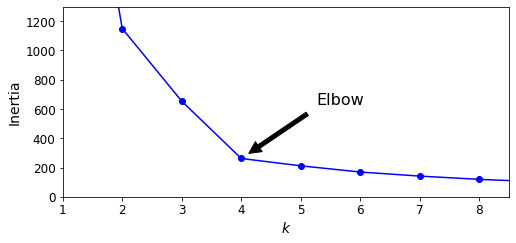

In [92]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
#给肘部一个标注
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])

plt.show()

In [93]:
from sklearn.metrics import silhouette_score

In [94]:
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [95]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

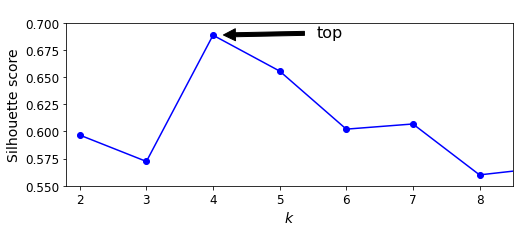

In [108]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.annotate('top',
             xy=(4, silhouette_scores[2]),
             xytext=(0.55, 0.9),#这个是控制箭头方向            
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

In [104]:
silhouette_scores[2]

0.688531617595759

In [113]:
#评价每一个样本的轮廓系数
silhouette_samples(X, kmeans_per_k[3].labels_)

array([0.7796651 , 0.66677869, 0.48656361, ..., 0.87850593, 0.70971862,
       0.45825862])

这样看的话，5对每一个分类的分类效果更加平均，可以称得上更好。

# 接下来看一看如何用聚类算法提高分类器效果

In [ ]:
# from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

In [125]:
from sklearn.datasets import load_digits
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [118]:
X_digits, y_digits = load_digits(return_X_y=True)

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

In [121]:
from sklearn.linear_model import LogisticRegression

In [124]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)
log_reg_score = log_reg.score(X_test, y_test)
log_reg_score

0.9688888888888889

In [126]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=42)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [127]:
pipeline_score = pipeline.score(X_test, y_test)
pipeline_score

0.9777777777777777

In [130]:
#效果还是挺明显的
round(1 - (1 - pipeline_score) / (1 - log_reg_score),2)

0.29

In [132]:
n_labeled = 50

In [133]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.8333333333333334

In [134]:
X_train[:n_labeled].shape

(50, 64)

选择距离五十个簇心分别最近的50个点，然后只对50个点进行打标，然后再用这五个点进行建模。
这是主动学习的思想 active learning

In [152]:
k=50

In [153]:
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

In [156]:
X_representative_digits.shape

(50, 64)

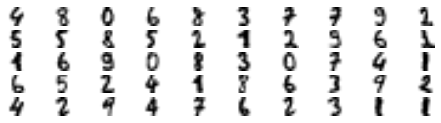

In [155]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')
plt.show()

In [160]:
y_train[representative_digit_idx]

array([4, 8, 0, 6, 8, 3, 7, 7, 9, 2, 5, 5, 8, 5, 2, 1, 2, 9, 6, 1, 1, 6,
       9, 0, 8, 3, 0, 7, 4, 1, 6, 5, 2, 4, 1, 8, 6, 3, 9, 2, 4, 2, 9, 4,
       7, 6, 2, 3, 1, 1])

In [162]:
y_representative_digits = np.array([4, 8, 0, 6, 8, 3, 7, 7, 9, 2, 5, 5, 8, 5, 2, 1, 2, 9, 6, 1, 1, 6,
       9, 0, 8, 3, 0, 7, 4, 1, 6, 5, 2, 4, 1, 8, 6, 3, 9, 2, 4, 2, 9, 4,
       7, 6, 2, 3, 1, 1])

In [163]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.9222222222222223

这里是用这50个有标记的距离簇心最近的点来标记其他的点，和这50个点在同一簇内的其他点被赋予该点的标记。
这是标签传播

In [166]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [176]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [177]:
log_reg.score(X_test, y_test)

0.9333333333333333

In [191]:
percentile_closest = 75
#取每个样本所在label的距离
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]

In [225]:
k

50

In [222]:
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]#每个label下各样本的距离
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)#取前75%
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1#选择在这个label下，并且距离大于75%的赋值为-1

In [233]:
(X_cluster_dist != -1)

array([False,  True,  True, ...,  True,  True,  True])

In [235]:
X_train[(X_cluster_dist != -1)].shape

(1003, 64)

In [230]:
(X_cluster_dist != -1).sum()

1003

In [236]:
#赋值为-1的样本视为outliers，全部删除
X_train_partially_propagated = X_train[(X_cluster_dist != -1)]
y_train_partially_propagated = y_train_propagated[(X_cluster_dist != -1)]

In [237]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [238]:
#正确率有所上升
log_reg.score(X_test, y_test)

0.9355555555555556

In [242]:
#对比一下发现，在只取最近的75%进行标签传播，正确率比对所有聚类样本进行标签传播要高
np.mean(y_train_partially_propagated ==  y_train[(X_cluster_dist != -1)])

0.9750747756729811

In [244]:
np.mean(y_train_propagated==y_train)

0.9391239792130661

k-means优点：

原理比较简单，实现也是很容易，收敛速度快。

聚类效果较优。

算法的可解释度比较强。

主要需要调参的参数仅仅是簇数k。

k-means缺点：

K值的选取不好把握。

对于不是凸的数据集比较难收敛。

如果各隐含类别的数据不平衡，比如各隐含类别的数据量严重失衡，或者各隐含类别的方差不同，则聚类效果不佳。

采用迭代方法，得到的结果只是局部最优。

对噪音和异常点比较的敏感。

DBSCAN优点：

可以对任意形状的稠密数据集进行聚类，相对的，K-Means之类的聚类算法一般只适用于凸数据集。

可以在聚类的同时发现异常点，对数据集中的异常点不敏感。

聚类结果没有偏倚，相对的，K-Means之类的聚类算法初始值对聚类结果有很大影响。

DBSSCAN缺点：

如果样本集的密度不均匀、聚类间距差相差很大时，聚类质量较差，这时用DBSCAN聚类一般不适合。

如果样本集较大时，聚类收敛时间较长，此时可以对搜索最近邻时建立的KD树或者球树进行规模限制来改进。

调参相对于传统的K-Means之类的聚类算法稍复杂，主要需要对距离阈值ϵ，邻域样本数阈值MinPts联合调参，不同的参数组合对最后的聚类效果有较大影响。

DBSCAN聚类既可以用于凸样本集，也可以用于非凸样本集，也不需要提前设定簇族数

核心参数：

eps: float，ϵ-邻域的距离阈值

min_samples ：int，样本点要成为核心对象所需要的 ϵ-邻域的样本数阈值

其他参数：

metric ：度量方式，默认为欧式距离，可以使用的距离度量参数有：

欧式距离 “euclidean”

曼哈顿距离 “manhattan”

切比雪夫距离“chebyshev”

闵可夫斯基距离 “minkowski”

带权重闵可夫斯基距离 “wminkowski”

标准化欧式距离 “seuclidean”

马氏距离“mahalanobis”

自己定义距离函数

algorithm：近邻算法求解方式，有四种：

“brute”蛮力实现

“kd_tree” KD树实现

“ball_tree”球树实现

“auto”上面三种算法中做权衡，选择一个拟合最好的最优算法。

leaf_size：使用“ball_tree”或“kd_tree”时,停止建子树的叶子节点数量的阈值

In [260]:
from sklearn.cluster import DBSCAN

In [263]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [264]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [269]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5], dtype=int64)

In [268]:
dbscan.components_

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

# 高斯混合模型、数据生成和异常检测

需要注意的是，使用高斯混合之前最好对数据进行初始化？

In [ ]:
from sklearn import preprocessing  
X_tr = preprocessing.scale(X, *, axis=0, with_mean=True, with_std=True, copy=True)

In [271]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [272]:
from sklearn.mixture import GaussianMixture

In [273]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

em算法的参数

In [274]:
gm.weights_

array([0.39025715, 0.40007391, 0.20966893])

In [275]:
gm.means_

array([[ 0.05131611,  0.07521837],
       [-1.40763156,  1.42708225],
       [ 3.39893794,  1.05928897]])

In [276]:
gm.covariances_

array([[[ 0.68799922,  0.79606357],
        [ 0.79606357,  1.21236106]],

       [[ 0.63479409,  0.72970799],
        [ 0.72970799,  1.1610351 ]],

       [[ 1.14833585, -0.03256179],
        [-0.03256179,  0.95490931]]])

In [277]:
gm.converged_

True

In [278]:
gm.n_iter_

4

In [279]:
gm.predict(X)

array([0, 0, 1, ..., 2, 2, 2], dtype=int64)

In [280]:
#GMM算法可以计算每个样本属于各类别的概率
gm.predict_proba(X)

array([[9.76741808e-01, 6.78581203e-07, 2.32575136e-02],
       [9.82832955e-01, 6.76173663e-04, 1.64908714e-02],
       [7.46494398e-05, 9.99923327e-01, 2.02398402e-06],
       ...,
       [4.26050456e-07, 2.15512941e-26, 9.99999574e-01],
       [5.04987704e-16, 1.48083217e-41, 1.00000000e+00],
       [2.24602826e-15, 8.11457779e-41, 1.00000000e+00]])

In [281]:
#GM算法还可以生成相同分布的数据
X_new, y_new = gm.sample(6)
X_new

array([[-0.86944074, -0.32767626],
       [ 0.29836051,  0.28297011],
       [-2.8014927 , -0.09047309],
       [ 3.98203732,  1.49951491],
       [ 3.81677148,  0.53095244],
       [ 2.84104923, -0.73858639]])

# 如何用高斯混合模型来进行异常检测

高斯混合可以用于异常检测：位于低密度区域的实例可以被视为异常。
必须定义要使用的密度阈值。例如，在一家试图检测缺陷产品的制造公司中，
缺陷产品的比例通常是众所周知的。假设它等于4%，则可以将密度阈值设置为导致4%的实例位于该阈值密度以下区域的值：

这大概可以类比在高斯分布里处于低密度区域的点是异常值一样（3sigma法）

In [291]:
densities

array([-2.60768954, -3.57110232, -3.32987086, ..., -3.51347241,
       -4.39798588, -3.80746532])

In [283]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

In [290]:
anomalies

array([[-0.11118987,  1.61334992],
       [ 0.62362922,  4.41540435],
       [ 1.49808977, -0.15251688],
       [ 0.74219223, -1.00445177],
       [-2.53940854, -2.76549965],
       [-1.62447969, -0.45770022],
       [-1.74680316, -0.78385111],
       [-3.58308316, -1.28249917],
       [ 0.53903026,  5.00244257],
       [-0.51480414, -2.16270124],
       [-1.81015204, -0.58926015],
       [-1.79651788, -0.97031471],
       [-2.11225785, -2.09712817],
       [-3.39408574, -2.28378778],
       [ 1.58082729,  4.20122873],
       [-2.48037945, -1.18651064],
       [-2.93972237, -1.41660564],
       [-1.62285961, -2.84860478],
       [-0.25954463, -1.7743691 ],
       [ 0.46018217,  2.78323717],
       [-2.06317379,  2.2670332 ],
       [ 0.13982849,  2.08023553],
       [-2.54004484, -2.8290338 ],
       [-1.93037427, -1.19447352],
       [-0.27124433, -1.86750177],
       [-1.15568262, -2.57480367],
       [-1.93315582,  2.49030105],
       [ 4.93207567, -0.42157602],
       [ 5.80546094,

In [287]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

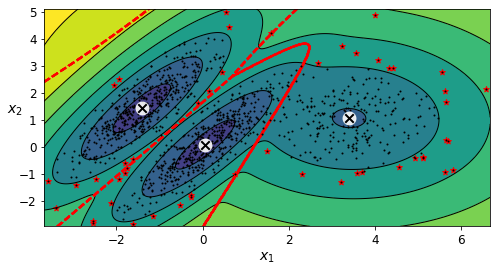

In [288]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

plt.show()

根据BIC和AIC指标来选择最优分组

In [294]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Window

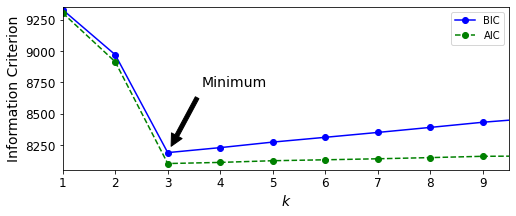

In [297]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
plt.show()

In [298]:
min_bic = np.infty

for k in range(1, 11):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10,
                              covariance_type=covariance_type,
                              random_state=42).fit(X).bic(X)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Window

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Window

In [299]:
best_k

3

In [300]:
best_covariance_type

'full'

In [301]:
from sklearn.mixture import BayesianGaussianMixture

In [302]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

In [303]:
#可以看出只有前三个有值，说明模型自动检测到只需要三个类别
np.round(bgm.weights_, 2)

array([0.4 , 0.21, 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

浓度参数 weight_concentration_prior设置越大，分的类别会越多。

In [307]:
bgm_low = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1,
                                  weight_concentration_prior=0.01, random_state=42)
bgm_high = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1,
                                  weight_concentration_prior=5, random_state=42)
nn = 73
bgm_low.fit(X[:nn])
bgm_high.fit(X[:nn])

BayesianGaussianMixture(max_iter=1000, n_components=10, random_state=42,
                        weight_concentration_prior=5)

In [305]:
np.round(bgm_low.weights_, 2)

array([0.52, 0.48, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [308]:
np.round(bgm_high.weights_, 2)

array([0.5 , 0.45, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.  , 0.  ])

In [309]:
X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [310]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X_moons)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

虽然看起来很怪，但是从密度上看，实际上还是分的不错的，所以重要的是密度图

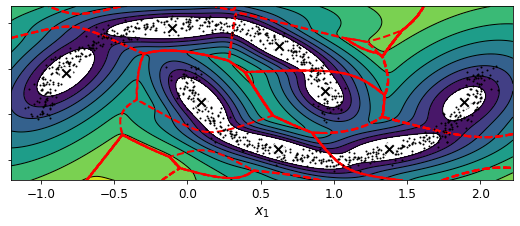

In [313]:
plt.figure(figsize=(9, 3.2))
plot_gaussian_mixture(bgm, X_moons, show_ylabels=False)

plt.show()

对于异常样本，看他们的score_samples会发现远低于正常样本 通常为负数

In [ ]:
gm.score_samples(X_bad_faces_pca)

In [ ]:
gm.score_samples(X_train_pca[:10])